# LAB5 e Texto

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: 
## Número: 

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab5.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

## Considere o ficheiro pickle $\texttt{Lab5Data.p}$
### Neste ficheiro encontra-se um dicionário de Python com as seguintes variáveis:
### 1. "X":             dados bi-dimensionais (1500 amostras)
### 2. "y":              classe dos dados (3 classes, inteiros de 0 a 2)
### 3. "foldTrain": array boleano indicando os dados a serem usados para treinar os classificadores
### 3. "foldTest": array boleano indicando os dados a serem usados para testar os classificadores


# Pergunta 1 - SVMs:
## i. Use os dados de treino para treinar uma máquina de suporte vetorial (SVM) para classificar os dados. Não especifique nenhum parâmetro ao declarar o classificador (ex: $\texttt{svm=SVC()}$). Classifique os dados de treino e de teste. Imprima o número total de erros e as matrizes de confusão para o treino e teste.
## ii. Repita a alínea anterior especificando o kernel RBF, e fazendo uma pesquisa em grelha (usando a função $\texttt{GridSearchCV}$, com o número de folds igual a 3 (três), para os parâmetros $\texttt{C}$ e $\texttt{gamma}$. Use os seguintes valores: $\texttt{C}=\{0.1,1,10,20\}$ e $\texttt{gamma}=\{0.01,0.1,1\}$. Imprima os valores dos parâmetros que obtiveram os melhores resultados.
## iii. Use os dados de treino para treinar uma máquina de suporte vetorial (SVM) com um kernel RBF e com os valores de $\texttt{C}$ e $\texttt{gamma}$ que obtiveram os melhores resultados na alínea anterior. Classifique os dados de treino e de teste. Imprima o número total de erros e as matrizes de confusão para o treino e teste.
## iv. Faça um "plot" dos dados de teste por classe, e dos erros do classificador SVM.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
D=pickle.load(open('Lab5Data.p','rb'))
print(D.keys())


dict_keys(['X', 'y', 'foldTrain', 'foldTest'])


In [2]:
X=D['X']
y=D['y']
f1=D['foldTrain']
f2=D['foldTest']
X1=X[:,f1]
y1=y[f1]
X2=X[:,f2]
y2=y[f2]
svm=SVC().fit(X1.T,y1)
y1e=svm.predict(X1.T)
y2e=svm.predict(X2.T)
print('Dados de Treino')
print('Nº total de erros:',np.sum(y1!=y1e))
print('Matriz de confusão')
print(confusion_matrix(y1,y1e))
print('='*80)
print('Dados de Teste')
print('Nº total de erros:',np.sum(y2!=y2e))
print('Matriz de confusão')
print(confusion_matrix(y2,y2e))

Dados de Treino
Nº total de erros: 55
Matriz de confusão
[[220  12   9]
 [  9 241   6]
 [ 11   8 217]]
Dados de Teste
Nº total de erros: 53
Matriz de confusão
[[243  11   5]
 [  8 231   5]
 [ 14  10 240]]


In [3]:
from sklearn.model_selection import GridSearchCV
gVal={'C':[0.1,1,10,20],'gamma':[0.01,0.1,1]}
gS=GridSearchCV(SVC(kernel='rbf'),gVal,cv=3).fit(X1.T,y1)
print(gS.best_params_)

{'C': 20, 'gamma': 0.1}


In [4]:
svm=SVC(kernel='rbf',C=20,gamma=0.1).fit(X1.T,y1)
y1e=svm.predict(X1.T)
y2e=svm.predict(X2.T)
print('Dados de Treino')
print('Nº total de erros:',np.sum(y1!=y1e))
print('Matriz de confusão')
print(confusion_matrix(y1,y1e))
print('='*80)
print('Dados de Teste')
print('Nº total de erros:',np.sum(y2!=y2e))
print('Matriz de confusão')
print(confusion_matrix(y2,y2e))

Dados de Treino
Nº total de erros: 62
Matriz de confusão
[[217  12  12]
 [  9 237  10]
 [ 10   9 217]]
Dados de Teste
Nº total de erros: 53
Matriz de confusão
[[243  11   5]
 [  9 228   7]
 [ 13   8 243]]


(-1.4186088292721362,
 1.5199547290941977,
 -1.8006926676528003,
 1.5271648142253822)

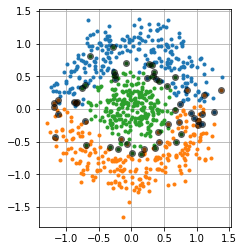

In [6]:
plt.plot(X2[0,y2==0],X2[1,y2==0],'.')
plt.plot(X2[0,y2==1],X2[1,y2==1],'.')
plt.plot(X2[0,y2==2],X2[1,y2==2],'.')
plt.plot(X2[0,y2!=y2e],X2[1,y2!=y2e],'ok',alpha=0.5)
plt.grid(True)
plt.axis('scaled')

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - Dados de texto $\texttt{melville-moby_dick.txt}$:
## i. Considere os documentos da lista "$\texttt{Docs}$" (obtidos a partir do texto de Moby Dick).  Limpe cada documento de modo a só conterem caracteres alfabéticos. 
## ii. Faça a representação tf-idf dos documentos limpos. Use só os seguintes parâmetros: $\texttt{min_df=3}$ e $\texttt{token_pattern=r'\b\w\w\w\w+\b'}$
## iii. Liste as 100 palavras (tokens) do vocabulário mais representativas.
## iv.  Liste as 100 palavras do vocabulário que aparecem no maior número de documentos.

In [7]:
f=open('melville-moby_dick.txt','r')
book=f.read()
bL=book.split('\n\n')
lc=[len(k) for k in bL]
Docs=[bL[k] for k in range(len(bL)) if lc[k]>100]
Docs=[d.replace('\n',' ') for d in Docs]

In [8]:
import re
Docs=[re.sub(r'[^a-zA-Z\u00C0-\u00FF]+',' ',doc) for doc in Docs]

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(min_df=3,token_pattern=r'\b\w\w\w\w+\b').fit(Docs)


In [17]:
voc=tfidf.get_feature_names()
X=tfidf.transform(Docs)
xM=np.max(X,axis=0).toarray().squeeze()
idx=np.argsort(-xM)
voc2=[voc[i] for i in idx]
print(voc2[:100])

['ginger', 'start', 'spring', 'porpoise', 'thunder', 'delight', 'cook', 'pull', 'owners', 'hearse', 'chap', 'fool', 'monsieur', 'follow', 'bell', 'waif', 'speaking', 'crow', 'huzza', 'purse', 'squeeze', 'bunger', 'canallers', 'bildad', 'heeded', 'queen', 'jonah', 'loose', 'drive', 'elephant', 'langsdorff', 'ghosts', 'chicha', 'grow', 'shiver', 'macey', 'flask', 'hemp', 'indispensable', 'bouton', 'line', 'cabaco', 'burtons', 'game', 'immortal', 'devil', 'queer', 'seven', 'down', 'turn', 'statement', 'luck', 'stump', 'letter', 'carpenter', 'master', 'compass', 'beer', 'stop', 'together', 'sleep', 'considering', 'monkey', 'yarman', 'shark', 'thou', 'aboard', 'balls', 'kill', 'roll', 'helm', 'blows', 'coffee', 'desert', 'gone', 'read', 'buffalo', 'temple', 'fish', 'sabbath', 'breeze', 'ambergris', 'lesson', 'deacon', 'child', 'maketh', 'examples', 'person', 'three', 'news', 'didst', 'farewell', 'doubts', 'yourself', 'whaling', 'facts', 'savage', 'remember', 'avast', 'perth']


In [20]:
voc=tfidf.get_feature_names()
idf=tfidf.idf_
idx=np.argsort(idf)
voc3=[voc[i] for i in idx]
print(voc3[:100])

['that', 'with', 'this', 'from', 'whale', 'there', 'have', 'which', 'then', 'some', 'were', 'like', 'when', 'upon', 'they', 'what', 'into', 'their', 'more', 'ship', 'them', 'other', 'these', 'over', 'ahab', 'been', 'would', 'only', 'down', 'will', 'such', 'though', 'time', 'long', 'still', 'than', 'very', 'head', 'great', 'before', 'here', 'about', 'those', 'last', 'must', 'said', 'most', 'after', 'seemed', 'again', 'boat', 'while', 'captain', 'round', 'first', 'little', 'every', 'much', 'whales', 'could', 'white', 'being', 'three', 'through', 'same', 'almost', 'hand', 'well', 'where', 'ever', 'side', 'might', 'sperm', 'thing', 'himself', 'even', 'good', 'away', 'stubb', 'water', 'never', 'deck', 'made', 'queequeg', 'look', 'should', 'your', 'world', 'among', 'without', 'many', 'pequod', 'starbuck', 'life', 'once', 'come', 'sort', 'seen', 'back', 'thou']
